In [3]:
!pip install optimuspyspark

    100% |████████████████████████████████| 112kB 2.1MB/s 
    100% |████████████████████████████████| 55.9MB 435kB/s 
    100% |████████████████████████████████| 213.4MB 84kB/s 
    100% |████████████████████████████████| 133kB 34.5MB/s 
    100% |████████████████████████████████| 235kB 32.6MB/s 
    100% |████████████████████████████████| 10.1MB 4.3MB/s 
    100% |████████████████████████████████| 51kB 22.8MB/s 
    100% |████████████████████████████████| 61kB 27.1MB/s 
    100% |████████████████████████████████| 2.0MB 9.4MB/s 
    100% |████████████████████████████████| 573kB 16.2MB/s 
    100% |████████████████████████████████| 768kB 15.9MB/s 
    100% |████████████████████████████████| 849kB 15.4MB/s 
    100% |████████████████████████████████| 430kB 16.3MB/s 
    100% |████████████████████████████████| 225kB 39.0MB/s 
    100% |████████████████████████████████| 184kB 41.0MB/s 
    100% |████████████████████████████████| 61kB 32.8MB/s 
    100% |████████████████████████████████| 1

In [0]:
from optimus import Optimus
op= Optimus(master="local")

In [0]:
df = op.create.df(
    [
        "names",
        "height(ft)",
        "function",
        "rank",
        "weight(t)",
        "japanese name",
        "last position",
        "attributes"
    ],
    [
        
        ("Optim'us", 28.0, "Leader", 10, 4.3, ["Inochi", "Convoy"], "19.442735,-99.201111",[8.5344, 4300.0]),
        ("bumbl#ebéé  ", 17.5, "Espionage", 7, 2.0, ["Bumble","Goldback"], "10.642707,-71.612534",[5.334, 2000.0]),
        ("ironhide&", 26.0, "Security", 7, 4.0, ["Roadbuster"], "37.789563,-122.400356",[7.9248, 4000.0]),
        ("Jazz",13.0, "First Lieutenant", 8, 1.8, ["Meister"], "33.670666,-117.841553",[3.9624, 1800.0]),
        ("Megatron",None, "None", None, 5.7, ["Megatron"], None,[None,5700.0]),
        ("Metroplex_)^$",300.0 , "Battle Station", 8, None, ["Metroflex"],None,[91.44, None]),
        
    ])

In [3]:
# View the data with plain spark
df.show() # kinda ugly

+-------------+----------+----------------+----+---------+------------------+--------------------+----------------+
|        names|height(ft)|        function|rank|weight(t)|     japanese name|       last position|      attributes|
+-------------+----------+----------------+----+---------+------------------+--------------------+----------------+
|     Optim'us|      28.0|          Leader|  10|      4.3|  [Inochi, Convoy]|19.442735,-99.201111|[8.5344, 4300.0]|
| bumbl#ebéé  |      17.5|       Espionage|   7|      2.0|[Bumble, Goldback]|10.642707,-71.612534| [5.334, 2000.0]|
|    ironhide&|      26.0|        Security|   7|      4.0|      [Roadbuster]|37.789563,-122.40...|[7.9248, 4000.0]|
|         Jazz|      13.0|First Lieutenant|   8|      1.8|         [Meister]|33.670666,-117.84...|[3.9624, 1800.0]|
|     Megatron|      null|            None|null|      5.7|        [Megatron]|                null|      [, 5700.0]|
|Metroplex_)^$|     300.0|  Battle Station|   8|     null|       [Metrof

In [4]:
f = op.create.df(
    [
        ("names", "str"),
        ("height", "float"),
        ("function", "str"),
        ("rank", "int"),
    ],
    [
        ("bumbl#ebéé  ", 17.5, "Espionage", 7),
        ("Optim'us", 28.0, "Leader", 10),
        ("ironhide&", 26.0, "Security", 7),
        ("Jazz",13.0, "First Lieutenant", 8),
        ("Megatron",None, "None", None),
        
    ])
df.show()

+-------------+----------+----------------+----+---------+------------------+--------------------+----------------+
|        names|height(ft)|        function|rank|weight(t)|     japanese name|       last position|      attributes|
+-------------+----------+----------------+----+---------+------------------+--------------------+----------------+
|     Optim'us|      28.0|          Leader|  10|      4.3|  [Inochi, Convoy]|19.442735,-99.201111|[8.5344, 4300.0]|
| bumbl#ebéé  |      17.5|       Espionage|   7|      2.0|[Bumble, Goldback]|10.642707,-71.612534| [5.334, 2000.0]|
|    ironhide&|      26.0|        Security|   7|      4.0|      [Roadbuster]|37.789563,-122.40...|[7.9248, 4000.0]|
|         Jazz|      13.0|First Lieutenant|   8|      1.8|         [Meister]|33.670666,-117.84...|[3.9624, 1800.0]|
|     Megatron|      null|            None|null|      5.7|        [Megatron]|                null|      [, 5700.0]|
|Metroplex_)^$|     300.0|  Battle Station|   8|     null|       [Metrof

In [5]:
import pandas as pd
import numpy as np

data = [("bumbl#ebéé  ", 17.5, "Espionage", 7),
         ("Optim'us", 28.0, "Leader", 10),
         ("ironhide&", 26.0, "Security", 7)]
labels = ["names", "height", "function", "rank"]

# Create pandas dataframe
pdf = pd.DataFrame.from_records(data, columns=labels)

df = op.create.df(pdf = pdf)
df.table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7
Optim'us,28.0,Leader,10
ironhide&,26.0,Security,7


In [6]:
df.cols.sort().show()

+---------+------+------------+----+
| function|height|       names|rank|
+---------+------+------------+----+
|Espionage|  17.5|bumbl#ebéé  |   7|
|   Leader|  28.0|    Optim'us|  10|
| Security|  26.0|   ironhide&|   7|
+---------+------+------------+----+



In [7]:
df.rows.sort("rank").show()

+------------+------+---------+----+
|       names|height| function|rank|
+------------+------+---------+----+
|    Optim'us|  28.0|   Leader|  10|
|bumbl#ebéé  |  17.5|Espionage|   7|
|   ironhide&|  26.0| Security|   7|
+------------+------+---------+----+



In [8]:
df.cols.select("names").show()

+------------+
|       names|
+------------+
|bumbl#ebéé  |
|    Optim'us|
|   ironhide&|
+------------+



In [9]:
df.select("names").show()

+------------+
|       names|
+------------+
|bumbl#ebéé  |
|    Optim'us|
|   ironhide&|
+------------+



In [10]:
df.rows.select(df["rank"]>7).show()

+--------+------+--------+----+
|   names|height|function|rank|
+--------+------+--------+----+
|Optim'us|  28.0|  Leader|  10|
+--------+------+--------+----+



In [11]:
df.filter(df["rank"]>7).show()

+--------+------+--------+----+
|   names|height|function|rank|
+--------+------+--------+----+
|Optim'us|  28.0|  Leader|  10|
+--------+------+--------+----+



In [12]:
df.create_id().show()

+------------+------+---------+----+----------+
|       names|height| function|rank|        id|
+------------+------+---------+----+----------+
|bumbl#ebéé  |  17.5|Espionage|   7|         0|
|    Optim'us|  28.0|   Leader|  10|8589934592|
|   ironhide&|  26.0| Security|   7|8589934593|
+------------+------+---------+----+----------+



In [13]:
df.cols.append("new_col",1).show()

+------------+------+---------+----+-------+
|       names|height| function|rank|new_col|
+------------+------+---------+----+-------+
|bumbl#ebéé  |  17.5|Espionage|   7|      1|
|    Optim'us|  28.0|   Leader|  10|      1|
|   ironhide&|  26.0| Security|   7|      1|
+------------+------+---------+----+-------+



In [14]:
from pyspark.sql.functions import lit
df.withColumn("new_col", lit(1)).show()

+------------+------+---------+----+-------+
|       names|height| function|rank|new_col|
+------------+------+---------+----+-------+
|bumbl#ebéé  |  17.5|Espionage|   7|      1|
|    Optim'us|  28.0|   Leader|  10|      1|
|   ironhide&|  26.0| Security|   7|      1|
+------------+------+---------+----+-------+



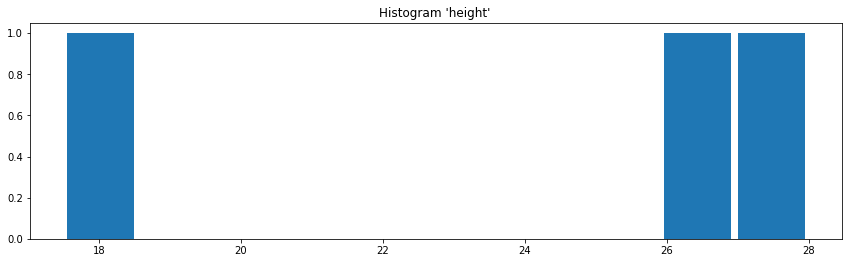

In [15]:
df.plot.hist("height",10)

In [19]:
df.show()

+------------+------+---------+----+
|       names|height| function|rank|
+------------+------+---------+----+
|bumbl#ebéé  |  17.5|Espionage|   7|
|    Optim'us|  28.0|   Leader|  10|
|   ironhide&|  26.0| Security|   7|
+------------+------+---------+----+



In [20]:
# Let's add a new column
df_new = op.create.df(
    [
        "try"
    ],
    [
        ("one"),
        ("two"),
        ("three")  
    ])

df_new = op.append([df,df_new], "columns")
df_new.show()

+------------+------+---------+----+-----+
|       names|height| function|rank|  try|
+------------+------+---------+----+-----+
|    Optim'us|  28.0|   Leader|  10|  two|
|bumbl#ebéé  |  17.5|Espionage|   7|  one|
|   ironhide&|  26.0| Security|   7|three|
+------------+------+---------+----+-----+



In [21]:
df_new.printSchema()

root
 |-- names: string (nullable = true)
 |-- height: double (nullable = true)
 |-- function: string (nullable = true)
 |-- rank: long (nullable = true)
 |-- try: string (nullable = true)



In [22]:
new_row = [("favio", 10, "Leader", 1, "new_row")]
df_new = df_new.rows.append(new_row).show()

+------------+------+---------+----+-------+
|       names|height| function|rank|    try|
+------------+------+---------+----+-------+
|    Optim'us|  28.0|   Leader|  10|    two|
|bumbl#ebéé  |  17.5|Espionage|   7|    one|
|   ironhide&|  26.0| Security|   7|  three|
|       favio|  10.0|   Leader|   1|new_row|
+------------+------+---------+----+-------+



In [23]:
# Let's create a dataframe :)


from pyspark.sql.types import StructType, StructField, StringType, BooleanType, IntegerType, ArrayType

df = op.create.df(
            [
                ("words", "str", True),
                ("num", "int", True),
                ("animals", "str", True),
                ("thing", StringType(), True),
                ("two strings", StringType(), True),
                ("filter", StringType(), True),
                ("num 2", "string", True),
                ("col_array",  ArrayType(StringType()), True),
                ("col_int",  ArrayType(IntegerType()), True)

            ]
,
[
                ("  I like     fish  ", 1, "dog", "housé", "cat-car", "a","1",["baby", "sorry"],[1,2,3]),
                ("    zombies", 2, "cat", "tv", "dog-tv", "b","2",["baby 1", "sorry 1"],[3,4]),
                ("simpsons   cat lady", 2, "frog", "table","eagle-tv-plus","1","3", ["baby 2", "sorry 2"], [5,6,7]),
                (None, 3, "eagle", "glass", "lion-pc", "c","4", ["baby 3", "sorry 3"] ,[7,8])
            ])
df.show()

+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+
|              words|num|animals|thing|  two strings|filter|num 2|        col_array|  col_int|
+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+
|  I like     fish  |  1|    dog|housé|      cat-car|     a|    1|    [baby, sorry]|[1, 2, 3]|
|            zombies|  2|    cat|   tv|       dog-tv|     b|    2|[baby 1, sorry 1]|   [3, 4]|
|simpsons   cat lady|  2|   frog|table|eagle-tv-plus|     1|    3|[baby 2, sorry 2]|[5, 6, 7]|
|               null|  3|  eagle|glass|      lion-pc|     c|    4|[baby 3, sorry 3]|   [7, 8]|
+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+



In [24]:
columns = ["words", 1, "animals", 3]
df.cols.select(columns).show()

+-------------------+---+-------+-----+
|              words|num|animals|thing|
+-------------------+---+-------+-----+
|  I like     fish  |  1|    dog|housé|
|            zombies|  2|    cat|   tv|
|simpsons   cat lady|  2|   frog|table|
|               null|  3|  eagle|glass|
+-------------------+---+-------+-----+



In [25]:
df.cols.select("n.*", regex = True).show()

+---+-----+
|num|num 2|
+---+-----+
|  1|    1|
|  2|    2|
|  2|    3|
|  3|    4|
+---+-----+



In [26]:
df.cols.select("*", data_type = "str").show()

+-------------+-------+-----+-----+------+-------------------+
|  two strings|animals|thing|num 2|filter|              words|
+-------------+-------+-----+-----+------+-------------------+
|      cat-car|    dog|housé|    1|     a|  I like     fish  |
|       dog-tv|    cat|   tv|    2|     b|            zombies|
|eagle-tv-plus|   frog|table|    3|     1|simpsons   cat lady|
|      lion-pc|  eagle|glass|    4|     c|               null|
+-------------+-------+-----+-----+------+-------------------+



In [27]:
df.cols.rename('num','number').show()

+-------------------+------+-------+-----+-------------+------+-----+-----------------+---------+
|              words|number|animals|thing|  two strings|filter|num 2|        col_array|  col_int|
+-------------------+------+-------+-----+-------------+------+-----+-----------------+---------+
|  I like     fish  |     1|    dog|housé|      cat-car|     a|    1|    [baby, sorry]|[1, 2, 3]|
|            zombies|     2|    cat|   tv|       dog-tv|     b|    2|[baby 1, sorry 1]|   [3, 4]|
|simpsons   cat lady|     2|   frog|table|eagle-tv-plus|     1|    3|[baby 2, sorry 2]|[5, 6, 7]|
|               null|     3|  eagle|glass|      lion-pc|     c|    4|[baby 3, sorry 3]|   [7, 8]|
+-------------------+------+-------+-----+-------------+------+-----+-----------------+---------+



In [0]:
for view full view go to this site
https://community.platform.matrixds.com/community/project/5c5907039298c0508b9589d2/files